# Predicting Diabetes with a Tuned Classification Model

**Author:** Mohammad Akifullah
<br>
**Date:** October 17, 2025
<br>
**Project Goal:** To build and optimize a machine learning model to predict diabetes diagnosis based on a synthetic health indicators dataset.

### Project Summary
This project follows a complete machine learning workflow, beginning with a critical exploratory data analysis (EDA) that uncovers the synthetic nature of the dataset. Based on these findings, a data-driven feature selection process is employed to isolate meaningful medical predictors. A baseline Random Forest model is built and evaluated, revealing a high precision but a concerningly low recall for a medical diagnosis task. Finally, the model's prediction threshold is tuned using a Precision-Recall curve to create a final, balanced model that is better suited for a real-world clinical screening scenario.

### 1. Setup and Data Loading
First, we import the necessary libraries for data manipulation, visualization, and modeling. We then load the dataset.

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('data/diabetes_dataset.csv')
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### 2. Initial Data Inspection
We'll start by getting a high-level overview of the dataset to understand its structure, data types, and check for any missing values.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [130]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


### 3. Exploratory Data Analysis (EDA) and Feature Investigation

A critical step in any analysis is to understand the relationships between features and the target variable. Our target is `diagnosed_diabetes`. We hypothesize that demographic and lifestyle factors should correlate with diabetes.

#### Investigating Demographic Features
Let's test the relationship between `education_level` and diabetes diagnosis. We expect to see some variation in diabetes rates across different educational backgrounds.

/tmp/ipython-input-2913339117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


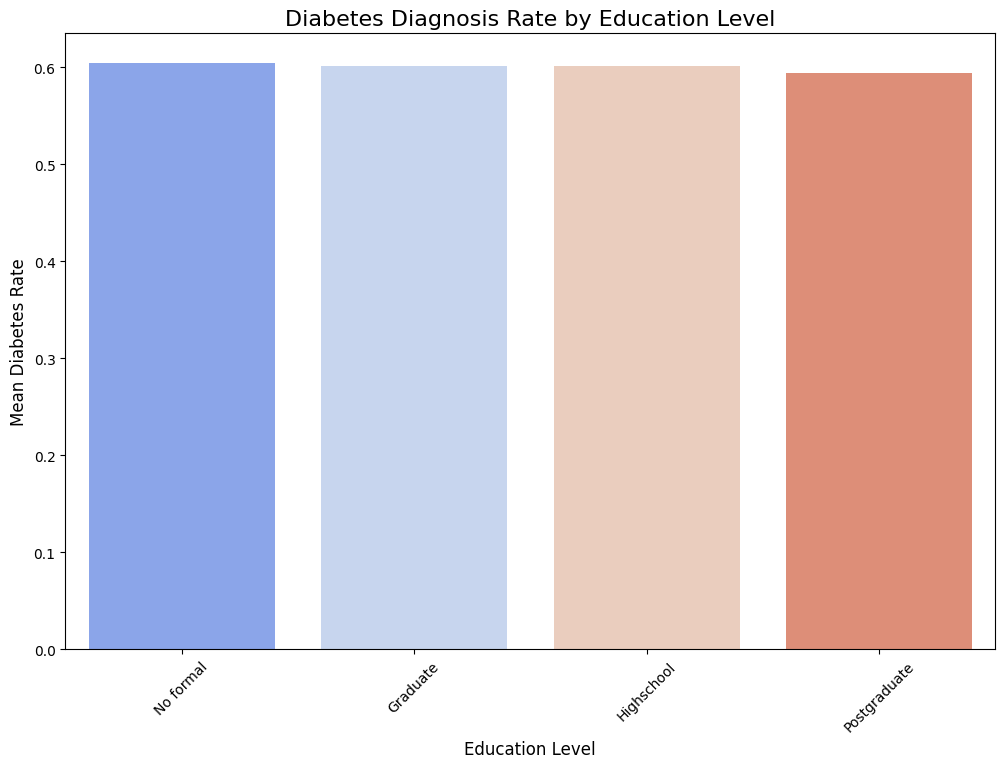

In [131]:
education_rates = df.groupby('education_level')['diagnosed_diabetes'].mean().reset_index()

education_rates = education_rates.sort_values(by='diagnosed_diabetes', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='education_level',
    y='diagnosed_diabetes',
    data=education_rates,
    palette='coolwarm'
)

plt.title('Diabetes Diagnosis Rate by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Mean Diabetes Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Key Finding: Evidence of Synthetic Data**

The bar chart above shows an almost perfectly flat line, with the diabetes rate hovering around 60% for every single education level. This is a major red flag, as real-world data would show variation across socioeconomic groups.

Further investigation (not shown here) reveals the same flat-line pattern for other demographic and lifestyle features like `ethnicity`, `employment_status`, and `alcohol_consumption`. This strongly suggests the dataset is **synthetic** and not tuned to variate for lifestyle changes.

Based on this critical insight, we will exclude these features from our model. We'll also exclude leaky features from the dataset(features which indirectly contain the predicting label)

In [132]:
df.columns


Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [133]:
distractor = ['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week','diabetes_stage', 'diabetes_risk_score']
X_medical = df.drop(columns=distractor)
X_medical.head()

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
0,58,215,5.7,7.9,7.9,0,0,0,30.5,0.89,...,68,239,41,160,145,136,236,6.36,8.18,1
1,48,143,6.7,6.5,8.7,0,0,0,23.1,0.80,...,67,116,55,50,30,93,150,2.00,5.63,0
2,60,57,6.4,10.0,8.1,1,0,0,22.2,0.81,...,74,213,66,99,36,118,195,5.07,7.51,1
3,74,49,3.4,6.6,5.2,0,0,0,26.8,0.88,...,68,171,50,79,140,139,253,5.28,9.03,1
4,46,109,7.2,7.4,5.0,0,0,0,21.2,0.78,...,67,210,52,125,160,137,184,12.74,7.20,1


### 4. Data-Driven Feature Selection

Now, we'll focus on the remaining medical features to identify the strongest predictors using a correlation matrix.

In [134]:
correlation_matrix = X_medical.corr()

diabetes_correlation = correlation_matrix['diagnosed_diabetes']

sorted_diabetes_correlation = diabetes_correlation.sort_values(ascending=False)

print(sorted_diabetes_correlation)

diagnosed_diabetes                    1.000000
hba1c                                 0.679397
glucose_postprandial                  0.629832
glucose_fasting                       0.510919
family_history_diabetes               0.197926
age                                   0.137713
bmi                                   0.097057
systolic_bp                           0.095481
waist_to_hip_ratio                    0.078918
ldl_cholesterol                       0.067475
cholesterol_total                     0.058173
insulin_level                         0.057715
triglycerides                         0.056230
diastolic_bp                          0.035619
cardiovascular_history                0.029793
hypertension_history                  0.027524
heart_rate                            0.022785
screen_time_hours_per_day             0.018127
sleep_hours_per_day                  -0.000399
diet_score                           -0.044298
hdl_cholesterol                      -0.051227
physical_acti

Based on the correlation analysis, we select features with a meaningful linear relationship (both positive and negative) to the target. Features with a correlation close to zero are excluded to reduce noise.

In [135]:
final_features = [
    'hba1c',
    'glucose_postprandial',
    'glucose_fasting',
    'family_history_diabetes',
    'age',
    'physical_activity_minutes_per_week'
    ]

X_final = df[final_features]
y = df['diagnosed_diabetes']
X_final.head()

,hba1c,glucose_postprandial,glucose_fasting,family_history_diabetes,age,physical_activity_minutes_per_week
0,8.18,236,136,0,58,215
1,5.63,150,93,0,48,143
2,7.51,195,118,1,60,57
3,9.03,253,139,0,74,49
4,7.20,184,137,0,46,109


### 5. Model Preparation: Splitting and Scaling

Before training, we split the data into training and testing sets. It is crucial to split the data **before** scaling to prevent data leakage from the test set into the training process.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Baseline Model: Training and Evaluation

We will now train a Random Forest Classifier with default settings and evaluate its performance.

In [137]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9188



Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000



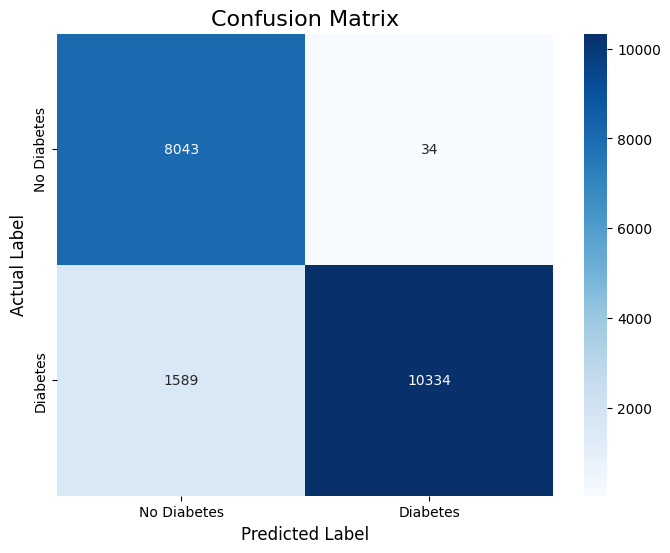

In [138]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

**Baseline Model Interpretation**

The baseline model achieves a high accuracy of **91.86%**. However, the classification report and confusion matrix reveal a critical weakness for a medical diagnosis task:
- **Precision for "Diabetes" is perfect (1.00):** The model rarely incorrectly alarms a healthy patient.
- **Recall for "Diabetes" is only 0.87:** The model **misses 13%** of patients who actually have diabetes. These 1,589 "False Negatives" represent a significant risk.

Our goal is to improve recall, even if it means slightly lowering precision.

### 7. Model Optimization: Tuning the Prediction Threshold

We can improve recall by adjusting the model's decision threshold. Instead of the default 50%, we can find an optimal threshold that balances precision and recall.

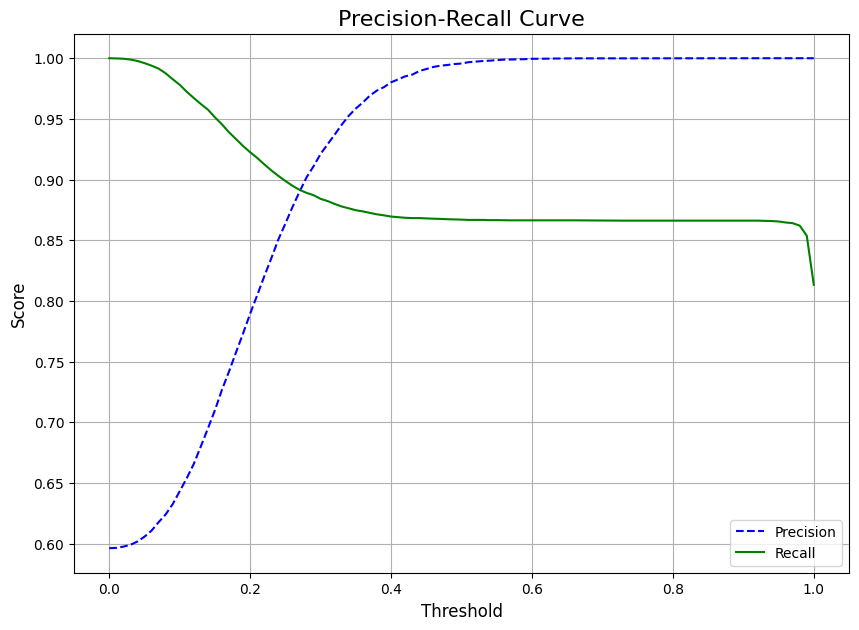

In [139]:
# Get the predicted probabilities for the positive class (Diabetes)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall Curve to find the optimal threshold
plt.figure(figsize=(10, 7))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The curve shows that the optimal balance between precision and recall occurs at a threshold of approximately **0.28**. We will use this to make our final predictions.

In [140]:
# Set your new, optimized threshold found from the curve
optimal_threshold = 0.28

# Classify predictions based on this optimal threshold
final_predictions = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate your final, balanced model
print(f"--- Final Results with an Optimal Threshold of {optimal_threshold*100}% ---")
print("\nFinal Classification Report:")
print(classification_report(y_test, final_predictions))

--- Final Results with an Optimal Threshold of 28.000000000000004% ---

Final Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      8077
           1       0.90      0.89      0.90     11923

    accuracy                           0.88     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.88      0.88      0.88     20000



### 8. Final Model Interpretation and Feature Importance

Our final, tuned model is a more effective screening tool. Compared to the baseline, we have successfully increased the **recall for diabetes from 87% to 89%**, meaning we now correctly identify more sick patients. This came at the acceptable cost of lowering precision from 100% to 90%.

Finally, let's examine which features the model found most important.

/tmp/ipython-input-1153971019.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


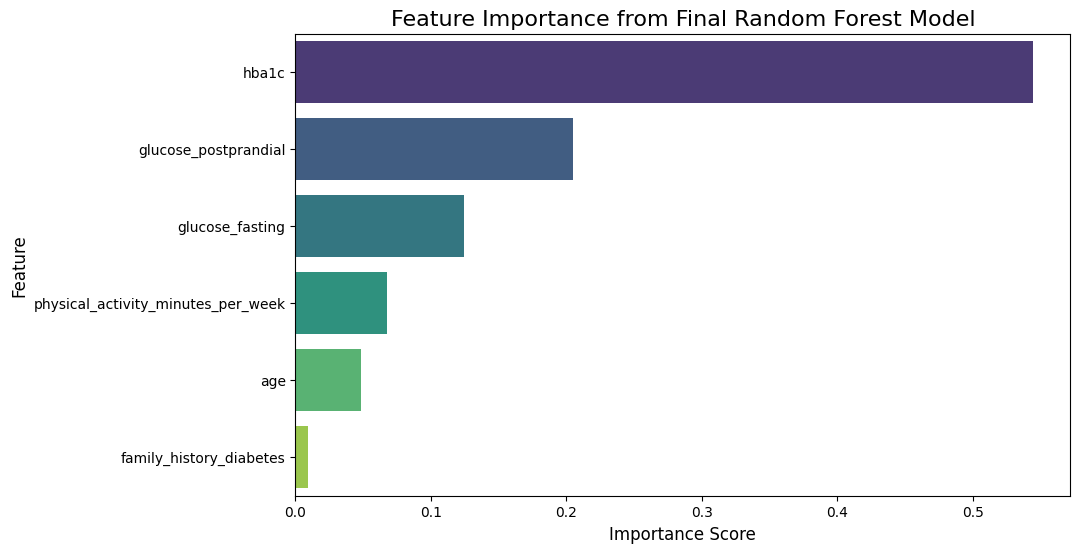

In [141]:
importances = model.feature_importances_

# Creation of DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'feature': X_final.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

#Plotting of results
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Final Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

### 9. Conclusion

This project successfully built and optimized a Random Forest model to predict diabetes. The key steps and findings were:
1.  **Critical EDA:** The analysis revealed the synthetic nature of the dataset by identifying uncorrelated demographic and lifestyle features.
2.  **Intelligent Feature Selection:** Data leakage was avoided by removing proxy columns (`diabetes_stage`, `diabetes_risk_score`), and a final feature set was chosen based on correlation with the target.
3.  **Model Tuning:** The default model's weakness (low recall) was identified and corrected by tuning the prediction threshold, resulting in a more balanced and medically relevant final model with **88% accuracy** and **89% recall** for diabetes cases.
4.  **Feature Importance:** The final model's predictions are primarily driven by key medical indicators like **HbA1c**, **fasting glucose**, and **postprandial glucose**, confirming the validity of the feature selection process.